<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics**
<hr />

# The Rayleigh problem and self-similarity

This notebook reviews the **Rayleigh problem**, the flow that develops in
a viscous fluid when an infinite flat wall is impulsively started in motion
to constant velocity $U$ tangent to the wall.

Here, we review the concepts of
- Viscous diffusion
- Self-similar flow
- Vorticity creation

### Set up the module

In [1]:
using FluidDynTools

In [4]:
using Pkg
Pkg.activate(joinpath(pkgdir(FluidDynTools))); Pkg.instantiate()

  Activating project at `~/.julia/packages/FluidDynTools/M78gW`


In [5]:
using Plots
using SpecialFunctions
using Printf

To solve this flow, we assume that the flow is incompressible and two-dimensional.
There is also no $x$ dependence. From continuity and the no-flow-through condition,
the velocity normal to the wall ($v$) is exactly zero.

The Navier-Stokes equations for this problem reduce to a linear partial differential
equation for $u(y,t)$, the velocity in the $x$ direction, parallel to the wall.

$$ \dfrac{\partial u}{\partial t} = \nu \dfrac{\partial^2 u}{\partial y^2} $$

subject to the no-slip boundary condition on the wall:

$$ u(0,t) = U $$

and another condition at $\infty$, where the flow is always at rest (i.e., it
never feels the wall's motion):

$$ u(\infty,t) = 0 $$

The initial condition is that the flow is at rest:

$$ u(y,0) = 0 $$

Obviously this is at odds with the boundary condition at the wall. In fact,
this mismatch is what leads to all of the behavior that follows.

Before we present the solution, let's reason this out physically: as the wall
starts moving, the fluid right next to the wall will start moving, too. Because
of viscosity, this fluid, in turn, makes fluid above it start moving, and so on.
Over time, diffusion will allow "information" about this wall's motion to
spread upward.

We expect that the thickness $\delta$ of the layer of fluid that is in motion must be
dependent on time $t$ and on kinematic viscosity $\nu$. By dimensional analysis,
this thickness must be $\delta(t) \propto \sqrt{\nu t}$. It does not actually
matter what the constant of proportionality is. By convention, we
define the thickness as $\delta(t) = \sqrt{4 \nu t}$

In [6]:
δ(t;ν = 1) = sqrt(4*ν*t)

δ (generic function with 1 method)

The exact solution for this problem can be derived using a *similarity transform*.
Basically, we hypothesize that the $y$ dependence of $u$ should be measured
in units of $\delta(t)$, because there is no other length scale in the problem.
We will make sense of this later. For now, we express this idea mathematically. We
propose that the solution should take the form

$$ u(y,t) = U F(\eta) $$

where $\eta = y/\delta(t)$. This $\eta$ is a dimensionless $y$ coordinate.

The $U$ factor makes sense: if we double the wall speed, we expect the
velocity in the fluid to double, as well. Note that we are also proposing that
$y$ and $t$ do not affect the velocity separately, but instead, in a mixed way.
We will explore what this means physically a little bit later.
But mathematically, we are proposing that there is only *one* independent variable $\eta$, not
two ($y$ and $t$). If we are right about this, then, by substituting this into the
original PDE for $u(y,t)$, we should get an ODE for $F(\eta)$.

In fact,
after doing this, applying the chain rule, and simplifying, we do get an ODE:

$$ F'' + 2 \eta F' = 0$$

subject to two conditions, $F(0) = 1$ (the "dimensionless" no-slip condition)
and $F(\infty) = 0$. The solution is

$$ F(\eta) = 1 - \mathrm{erf}(\eta) $$

where $\mathrm{erf}$ is the error function.

In [7]:
F(η) = 1 - erf(η)

F (generic function with 1 method)

Let's plot this. It's a dimensionless profile, so we put $\eta$ on the
vertical axis:

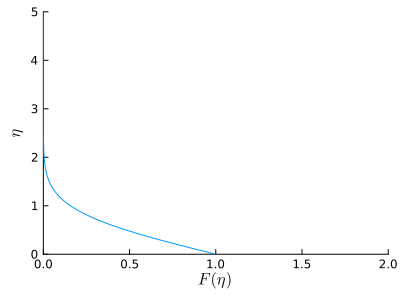

In [8]:
η = range(0.0,5.0,length=501)
plot(F.(η),η,xlims=(0,2),ylims=(0,5),xguide=L"F(\eta)",yguide=L"\eta")

### Back to the actual velocity
But what does this mean for the velocity? First, let's assemble the velocity,
now that we have $F$

$$ u(y,t) = U (1 - \mathrm{erf}(y/\sqrt{4\nu t})) $$

In [9]:
u(y,t;U=1,ν=1) = U*F(y/δ(t,ν=ν))

u (generic function with 1 method)

The velocity is time dependent, so we need to plot this at different times.
In fact, let's make it into a movie, so we can see how the profile changes:

[ Info: Saved animation to /Users/jeff/JuliaProjects/FluidDynTools/notebook/tmp.gif


Plots.AnimatedGif("/Users/jeff/JuliaProjects/FluidDynTools/notebook/tmp.gif")
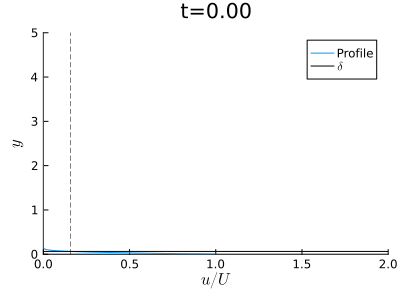

In [10]:
y = range(0,5,length=501)
timerange = range(0.001,2,length=81)

@gif for t in timerange
    plot(u.(y,t),y,xlim=(0,2),ylim=(0,Inf),xlabel=L"u/U",ylabel=L"y",label="Profile",title="t="*@sprintf("%.2f",t))
    hline!([δ(t)],linecolor=:black,linewidth=1,label=L"\delta")
    vline!([F(1)],label="",linecolor=:black,linewidth=0.5,linestyle=:dash,legend=:true)
end

This movie shows the layer getting thicker with time. However, the
shape of the velocity profile is always the same -- it just gets stretched out
as the layer grows!

Another way to understand this. Let's evaluate velocity at $y = 3$ at $t = 1$.
It is very small, about 3 percent of the wall velocity ($U=1$)

In [8]:
u(3,1)

0.03389485352468924

Now let's evaluate it at $t = 10$. It's now about half of the wall speed ($U=1$):

In [9]:
u(3,10)

0.502334954360502

### Vorticity
We hinted before that something funny happens at $t = 0$. The velocity
is equal to $U$ at $y = 0$ and $0$ right above it. This is a discontinuous
velocity, which viscosity immediately smooths over.

The discontinuous velocity means an *infinite* vorticity at $y = 0$ and 0 above it.
As time proceeds, this spike in vorticity (a Dirac delta function) gets
smoothed out into a Gaussian (bell curve) shape, maximum at the wall. In
other words, vorticity is *generated* at $t = 0$ at the wall, and then
spread upward by diffusion.

In [12]:
dF(η) = 2/sqrt(π)*exp(-η^2)
vort(y,t;U=1,ν=1) = U/δ(t,ν=ν)*dF(y/δ(t,ν=ν))

vort (generic function with 1 method)

[ Info: Saved animation to /Users/jeff/JuliaProjects/FluidDynTools/notebook/tmp.gif


Plots.AnimatedGif("/Users/jeff/JuliaProjects/FluidDynTools/notebook/tmp.gif")
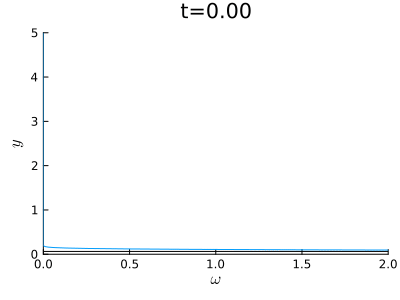

In [13]:
@gif for t in timerange
    plot(vort.(y,t),y,xlim=(0,2),ylim=(0,Inf),xlabel=L"\omega",ylabel=L"y",label="Profile",title="t="*@sprintf("%.2f",t))
    hline!([δ(t)],linecolor=:black,linewidth=1,label=L"\delta")
end

Though the vorticity spreads out and gets weaker, the integral under this curve
does not actually change at all! This is the *circulation* (per unit length of
the wall). The circulation remains constant over time.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*